In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import csv
import datetime
import gsw
import glob
import matplotlib as mpl
import matplotlib.cm as cm
#import matplotlib.colormaps as cmaps
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mpl_toolkits.axes_grid1.inset_locator as inset_axes
import numpy as np
from numpy import linspace
import os
import pandas as pd
#import rasterio.plot
import scipy.io
#import seaborn as sns
import seawater
import seawater.eos80 as sw
import xarray as xr
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from shapely.geometry import LineString, MultiLineString, Point, Polygon
from shapely.ops import unary_union


mpl.style.use('seaborn-muted')
#mpl.rc('font', family ='Arial')

/tmp/ipykernel_445978/3497992744.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-muted')


In [ ]:
########################################################################################################
########################################################################################################
###################################### 600m contour & shelf polygon ####################################
########################################################################################################
########################################################################################################

In [2]:
#load bathymetry data

# Open the NetCDF file with xarray
gebco_full = xr.open_dataset('../Data/Final/bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')


<Figure size 640x480 with 0 Axes>

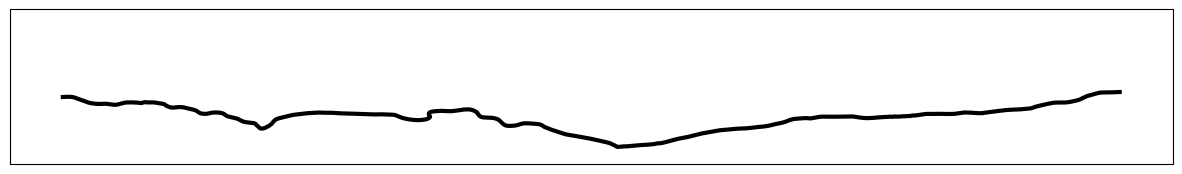

In [9]:
#This code extracts the contour at 600m along the shelf break and outputs it 
#had to manually make the lat lon bounds real close to it coz there was more than one conotur on the shelf at 600m,  then found the longest contour 
#couldn't do this with regular domain coz apparently one of the other ccontours was the longest and that's not the one i wanted


# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min, lon_max, lat_min, lat_max = 63, 72, -67.2, -66

# Crop the GEBCO data to match the extent
gebco = gebco_full.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1, ncols=1, wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15, 10])
ax = None

# Make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())

# Specify the desired contour level for the 600m isobath
desired_contour_level = -600

# Extract contour segments within the specified region
contour_line = ax.contour(gebco.lon, gebco.lat, gebco.elevation, levels=[desired_contour_level], colors='white', linewidths=3, extent=(lon_min, lon_max, lat_min, lat_max))


# Initialize variables to store the longest contour line
max_length = 0
desired_contour_line = None

# Iterate through the contour lines to find the longest one
for contour_path in contour_line.collections:  # Use contour_line directly
    # Extract the vertices of the contour line
    vertices = contour_path.get_paths()[0].vertices  # Use contour_path directly
    
    # Calculate the length of the contour line
    path_length = np.sum(np.sqrt(np.diff(vertices[:, 0])**2 + np.diff(vertices[:, 1])**2))
    
    if path_length > max_length:
        max_length = path_length
        desired_contour_line = contour_path  # Store the contour_path, not contour_line

# Check if a contour line was found
if desired_contour_line is not None:
    # Extract the coordinates of the desired contour line
    contour_line_coordinates_shelf = desired_contour_line.get_paths()[0].vertices
    
    # Remove the original contours
    for contour_path in contour_line.collections:  # Use contour_line directly
        contour_path.remove()
    
    # Plot the desired contour line
    ax.plot(contour_line_coordinates_shelf[:, 0], contour_line_coordinates_shelf[:, 1], color='black', linewidth=3)
else:
    # Handle the case where no desired contour line was found
    print("No desired contour line found.")

<Figure size 640x480 with 0 Axes>

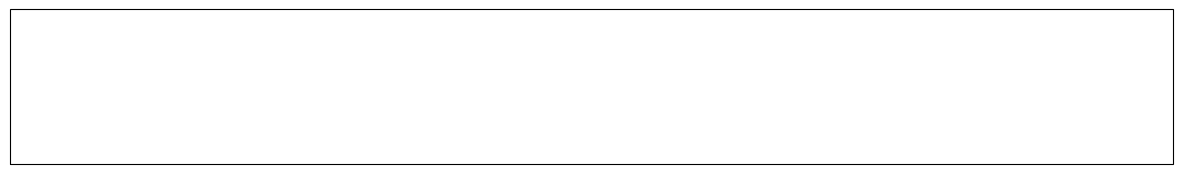

In [16]:
#This code extracts the contour at 600m along the shelf break and outputs it 
#had to manually make the lat lon bounds real close to it coz there was more than one conotur on the shelf at 600m,  then found the longest contour 
#couldn't do this with regular domain coz apparently one of the other ccontours was the longest and that's not the one i wanted


# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min, lon_max, lat_min, lat_max = 63, 72, -67.2, -66

# Crop the GEBCO data to match the extent
gebco = gebco_full.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1, ncols=1, wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15, 10])
ax = None

# Make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())

# Specify the desired contour level for the 600m isobath
desired_contour_level = -500

# Extract contour segments within the specified region
contour_line = ax.contour(gebco.lon, gebco.lat, gebco.elevation, levels=[desired_contour_level], colors='white', linewidths=3, extent=(lon_min, lon_max, lat_min, lat_max))


# Initialize variables to store the longest contour line
max_length = 0
desired_contour_line = None

# Iterate through the contour lines to find the longest one
for contour_path in contour_line.collections:  # Use contour_line directly
    # Extract the vertices of the contour line
    vertices = contour_path.get_paths()[0].vertices  # Use contour_path directly
    
    # Calculate the length of the contour line
    path_length = np.sum(np.sqrt(np.diff(vertices[:, 0])**2 + np.diff(vertices[:, 1])**2))
    
    if path_length > max_length:
        max_length = path_length
        desired_contour_line = contour_path  # Store the contour_path, not contour_line

# Check if a contour line was found
if desired_contour_line is not None:
    # Extract the coordinates of the desired contour line
    contour_line_coordinates_shelf = desired_contour_line.get_paths()[0].vertices
    
    # Remove the original contours
    for contour_path in contour_line.collections:  # Use contour_line directly
        contour_path.remove()
    
    # Plot the desired contour line
    ax.plot(contour_line_coordinates_shelf[:, 0], contour_line_coordinates_shelf[:, 1], color='black', linewidth=3)
else:
    # Handle the case where no desired contour line was found
    print("No desired contour line found.")

<Figure size 640x480 with 0 Axes>

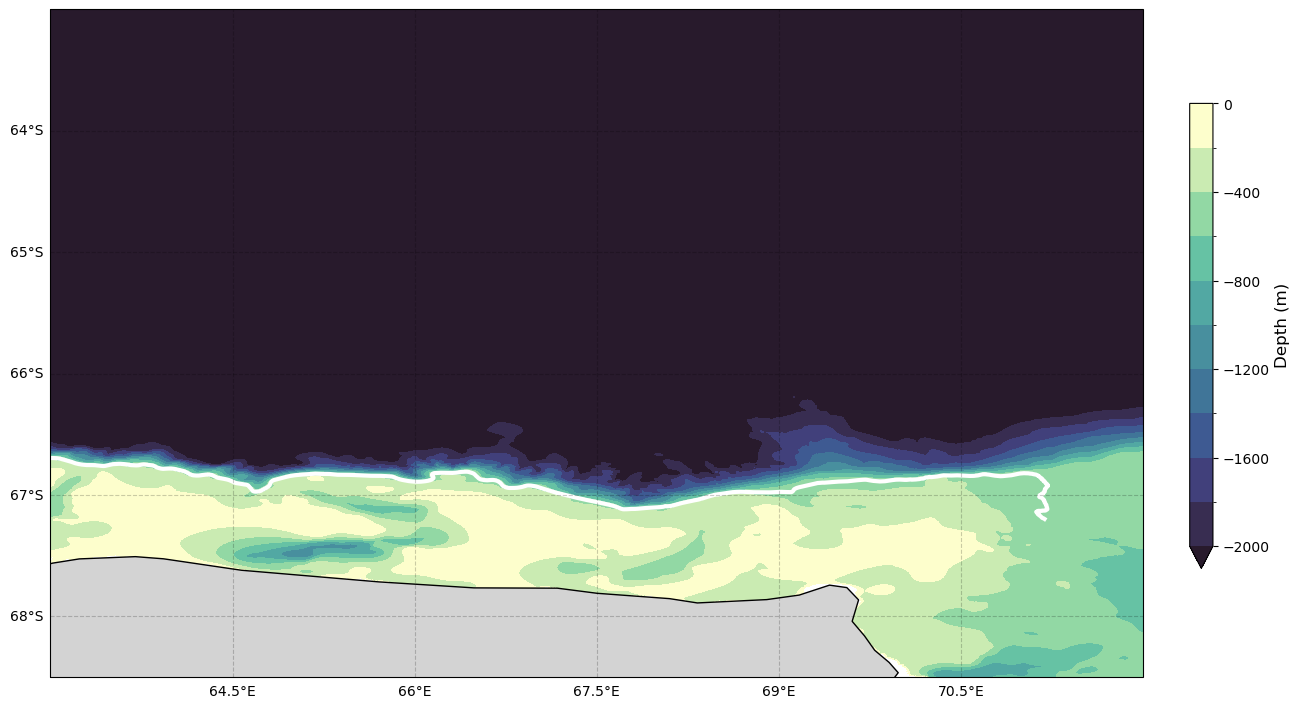

In [6]:
#This then plots the contour so you can visualise it 

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-2000,200,200)]),add_colorbar=False)

# Add a contour line for the 600m isobath
##contour_line_coordinates comes from 'CTD mapping seals and CTD with type' notebook. 
ax.plot(contour_line_coordinates_shelf[:, 0], contour_line_coordinates_shelf[:, 1], color='white', linewidth=3)


# Create a colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Depth (m)', fontsize=12)

plt.show()

In [ ]:
#if happy with it, export it to a .npy file
np.save('contour_coordinates_shelf_600m.npy', contour_line_coordinates_shelf)

In [13]:
#this creates the polygon with 3 straight lines and the one contour from above

# print(contour_line_coordinates)

# Create the Shapely LineString from the contour points
contour_line = LineString(contour_line_coordinates_shelf)

# Find the starting and ending coordinates of the contour line
start_lon, start_lat = contour_line_coordinates_shelf[0]
end_lon, end_lat = contour_line_coordinates_shelf[-1]

# print(start_lon, end_lon)
# print(start_lat, end_lat)

# Create the other three sides of the polygon
side1 = LineString([(end_lon, end_lat), (end_lon, -68.5)])
side2 = LineString([(end_lon, -68.5), (start_lon, -68.5)])
side3 = LineString([(start_lon, -68.5),(start_lon, start_lat)])

# Create an empty Polygon
polygon_shelf = Polygon()


# Create a polygon by passing the combined coordinates to the Polygon constructor
polygon_shelf = Polygon(list(contour_line.coords) + list(side1.coords) + list(side2.coords) + list(side3.coords))


# output the polygon to series of xy values
x, y = polygon_shelf.exterior.xy

<Figure size 640x480 with 0 Axes>

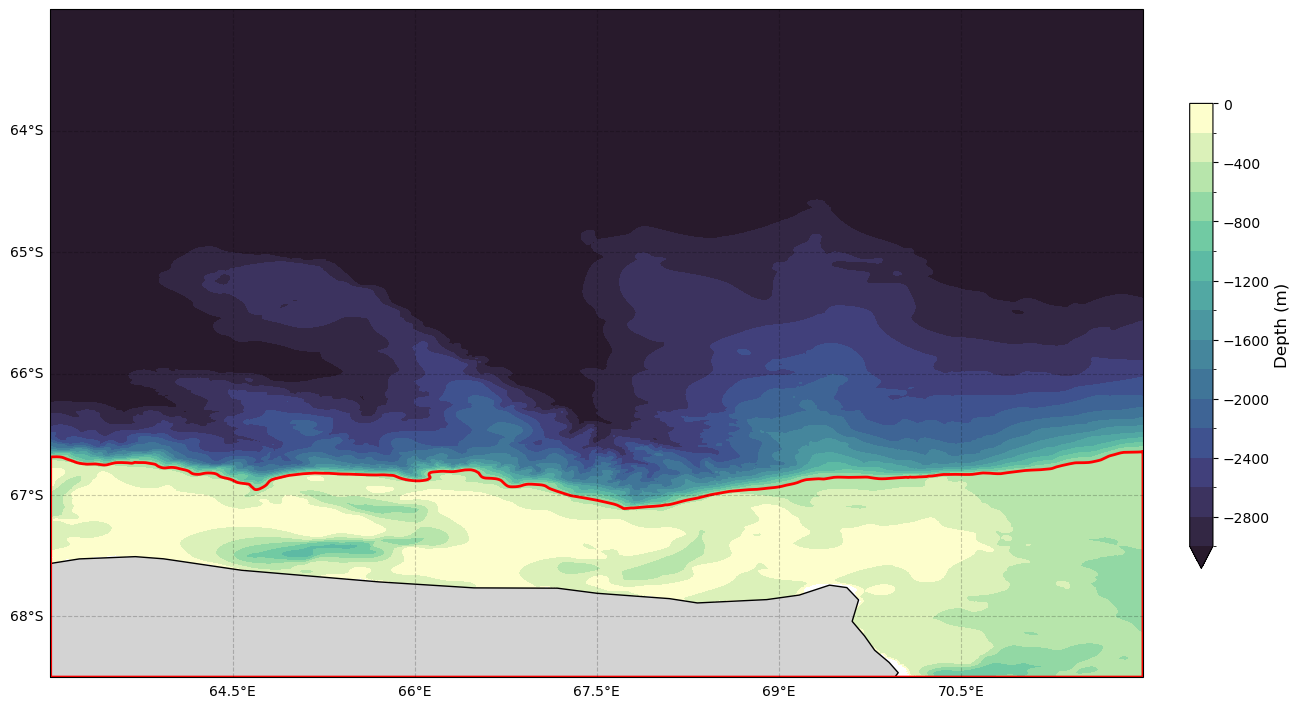

In [14]:
#This plots the polygon on the map to check it works

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-3000,200,200)]),add_colorbar=False)

# Add a contour line for the 600m isobath
##contour_line_coordinates comes from 'CTD mapping seals and CTD with type' notebook. 
#ax.plot(contour_line_coordinates[:, 0], contour_line_coordinates[:, 1], color='white', linewidth=3)

# # Plot the result using Matplotlib
# x, y = polygon.exterior.xy

# Plot the contour polygon
ax.plot(x, y, color='red', linewidth=2)

#add colourbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Depth (m)', fontsize=12)

plt.show()

In [7]:
#if happy with it, export it to a .csv file
# Open a CSV file for writing
with open('polygon_shelf.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['X', 'Y'])
    
    # Write the coordinates of the polygon's exterior ring
    for x, y in zip(polygon_shelf.exterior.xy[0], polygon_shelf.exterior.xy[1]):
        writer.writerow([x, y])

In [ ]:
########################################################################################################
########################################################################################################
###################################### 2000m contour & slope polygon ####################################
########################################################################################################
########################################################################################################

<Figure size 640x480 with 0 Axes>

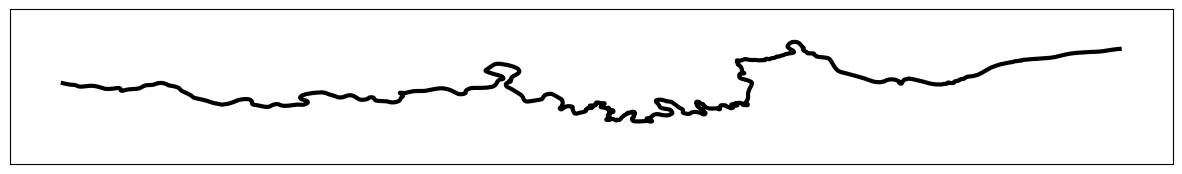

In [8]:
#This code extracts the contour at 2000m along the slope and outputs it 
#had to manually make the lat lon bounds real close to it coz there was more than one conotur on the shelf at 600m,  then found the longest contour 
#couldn't do this with regular domain coz apparently one of the other ccontours was the longest and that's not the one i wanted

# Define the latitude and longitude extent of your figure
lon_min, lon_max, lat_min, lat_max = 63, 72, -67.2, -66

# Crop the GEBCO data to match the extent
gebco = gebco_full.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1, ncols=1, wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15, 10])
ax = None

# Make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())

# Specify the desired contour level for the 600m isobath
desired_contour_level = -2000

# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min = 63
lon_max = 72
lat_min = -67.2
lat_max = -66

# Extract contour segments within the specified region
contour_line = ax.contour(gebco.lon, gebco.lat, gebco.elevation, levels=[desired_contour_level], colors='white', linewidths=3, extent=(lon_min, lon_max, lat_min, lat_max))


# Initialize variables to store the longest contour line
max_length = 0
desired_contour_line = None

# Iterate through the contour lines to find the longest one
for contour_path in contour_line.collections:  # Use contour_line directly
    # Extract the vertices of the contour line
    vertices = contour_path.get_paths()[0].vertices  # Use contour_path directly
    
    # Calculate the length of the contour line
    path_length = np.sum(np.sqrt(np.diff(vertices[:, 0])**2 + np.diff(vertices[:, 1])**2))
    
    if path_length > max_length:
        max_length = path_length
        desired_contour_line = contour_path  # Store the contour_path, not contour_line

# Check if a contour line was found
if desired_contour_line is not None:
    # Extract the coordinates of the desired contour line
    contour_line_coordinates_slope = desired_contour_line.get_paths()[0].vertices
    
    # Remove the original contours
    for contour_path in contour_line.collections:  # Use contour_line directly
        contour_path.remove()
    
    # Plot the desired contour line
    ax.plot(contour_line_coordinates_slope[:, 0], contour_line_coordinates_slope[:, 1], color='black', linewidth=3)
else:
    # Handle the case where no desired contour line was found
    print("No desired contour line found.")

<Figure size 640x480 with 0 Axes>

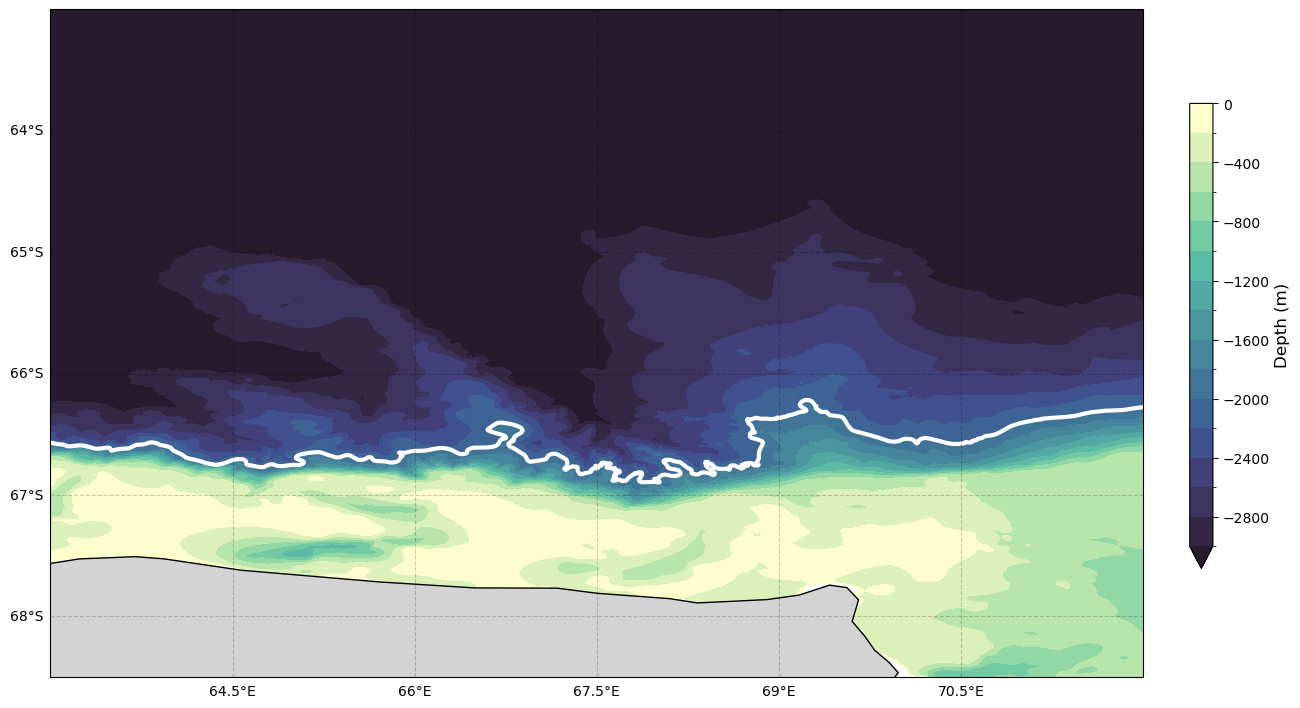

In [16]:
#This then plots the contour so you can visualise it 

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-3000,200,200)]),add_colorbar=False)

# Add a contour line for the 600m isobath
##contour_line_coordinates comes from 'CTD mapping seals and CTD with type' notebook. 
ax.plot(contour_line_coordinates_slope[:, 0], contour_line_coordinates_slope[:, 1], color='white', linewidth=3)

# Create a colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Depth (m)', fontsize=12)

plt.show()

In [17]:
#if happy with it, export it to a .npy file
np.save('contour_coordinates_slope_2000m.npy', contour_line_coordinates_slope)

In [18]:
#this creates the polygon with 2 straight lines, the one contour from above & the 600m contour

import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point, MultiLineString
from shapely.ops import unary_union

# print(contour_line_coordinates)

# Create the Shapely LineString from the contour points
#Need to flip/reverse this contour line otherwise polygon doesn't work nicely 
reversed_coordinates = contour_line_coordinates_shelf[::-1]
# Create a new LineString with the reversed coordinates
contour_line_shelf = LineString(reversed_coordinates)
#this contour can stay as is
contour_line_slope = LineString(contour_line_coordinates_slope)

# Find the starting and ending coordinates of the contour line
start_lon_slope, start_lat_slope = contour_line_coordinates_slope[0]
end_lon_slope, end_lat_slope = contour_line_coordinates_slope[-1]


# Find the starting and ending coordinates of the contour line
start_lon_shelf, start_lat_shelf = contour_line_coordinates_shelf[0]
end_lon_shelf, end_lat_shelf = contour_line_coordinates_shelf[-1]



print(start_lon_slope, end_lon_slope)
print(start_lat_slope, end_lat_slope)

print(start_lon_shelf, end_lon_shelf)
print(start_lat_shelf, end_lat_shelf)


# Create the other three sides of the polygon
side1 = LineString([(end_lon_slope, end_lat_slope), (end_lon_shelf, end_lat_shelf)])
side2 = LineString([(start_lon_shelf, start_lat_shelf), (start_lon_slope, start_lat_slope)])

# Create an empty Polygon
polygon_slope = Polygon()


# Create a polygon by passing the combined coordinates to the Polygon constructor
polygon_slope = Polygon(list(contour_line_slope.coords) + list(side1.coords) + list(contour_line_shelf.coords) + list(side2.coords))


# output the polygon to series of xy values
x, y = polygon_slope.exterior.xy

71.99791666666667 63.00208333333333
-66.27800925925926 -66.56963383838384
71.99791666666667 63.00208333333333
-66.64486111111111 -66.68753531073446


<Figure size 640x480 with 0 Axes>

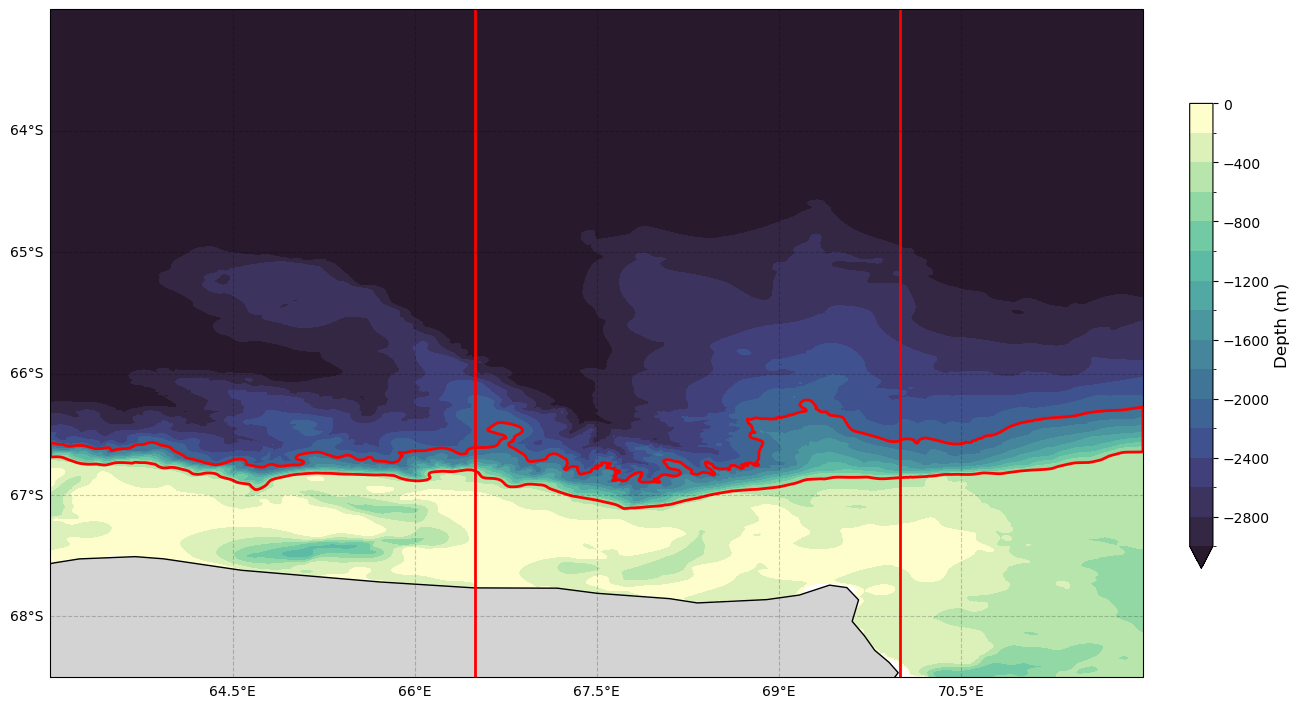

In [19]:
#This plots the polygon on the map to check it works

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-3000,200,200)]),add_colorbar=False)

# Add a contour line for the 600m isobath
##contour_line_coordinates comes from 'CTD mapping seals and CTD with type' notebook. 
#ax.plot(contour_line_coordinates[:, 0], contour_line_coordinates[:, 1], color='white', linewidth=3)

# # Plot the result using Matplotlib
# x, y = polygon.exterior.xy

# Plot the contour polygon
ax.plot(x, y, color='red', linewidth=2)

# Add red lines at longitude 66.5 and 70
ax.axvline(66.5, color='red', linewidth=2)
ax.axvline(70, color='red', linewidth=2)


# Create a colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Depth (m)', fontsize=12)

plt.show()

In [20]:
#if happy with it, export it to a .csv file
# Open a CSV file for writing
with open('polygon_slope.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['X', 'Y'])
    
    # Write the coordinates of the polygon's exterior ring
    for x, y in zip(polygon_slope.exterior.xy[0], polygon_slope.exterior.xy[1]):
        writer.writerow([x, y])

In [ ]:
########################################################################################################
########################################################################################################
########################################### offshore polygon ###########################################
########################################################################################################
########################################################################################################

In [21]:
#this creates the polygon with 3 straight lines and the one contour from above


# print(contour_line_coordinates)

# Create the Shapely LineString from the contour points
contour_line_slope = LineString(contour_line_coordinates_slope)

# Find the starting and ending coordinates of the contour line
start_lon_slope, start_lat_slope = contour_line_coordinates_slope[0]
end_lon_slope, end_lat_slope = contour_line_coordinates_slope[-1]


print(start_lon_slope, end_lon_slope)
print(start_lat_slope, end_lat_slope)


# Create the other three sides of the polygon
side1 = LineString([(end_lon_slope, end_lat_slope), (end_lon_slope, -63)])
side2 = LineString([(end_lon_slope, -63), (start_lon_slope, -63)])
side3 = LineString([(start_lon_slope, -63), (start_lon_slope, start_lat_slope)])

# Create an empty Polygon
polygon_offshore = Polygon()


# Create a polygon by passing the combined coordinates to the Polygon constructor
polygon_offshore = Polygon(list(contour_line_slope.coords) + list(side1.coords) + list(side2.coords) + list(side3.coords))


# output the polygon to series of xy values
x, y = polygon_offshore.exterior.xy

71.99791666666667 63.00208333333333
-66.27800925925926 -66.56963383838384


<Figure size 640x480 with 0 Axes>

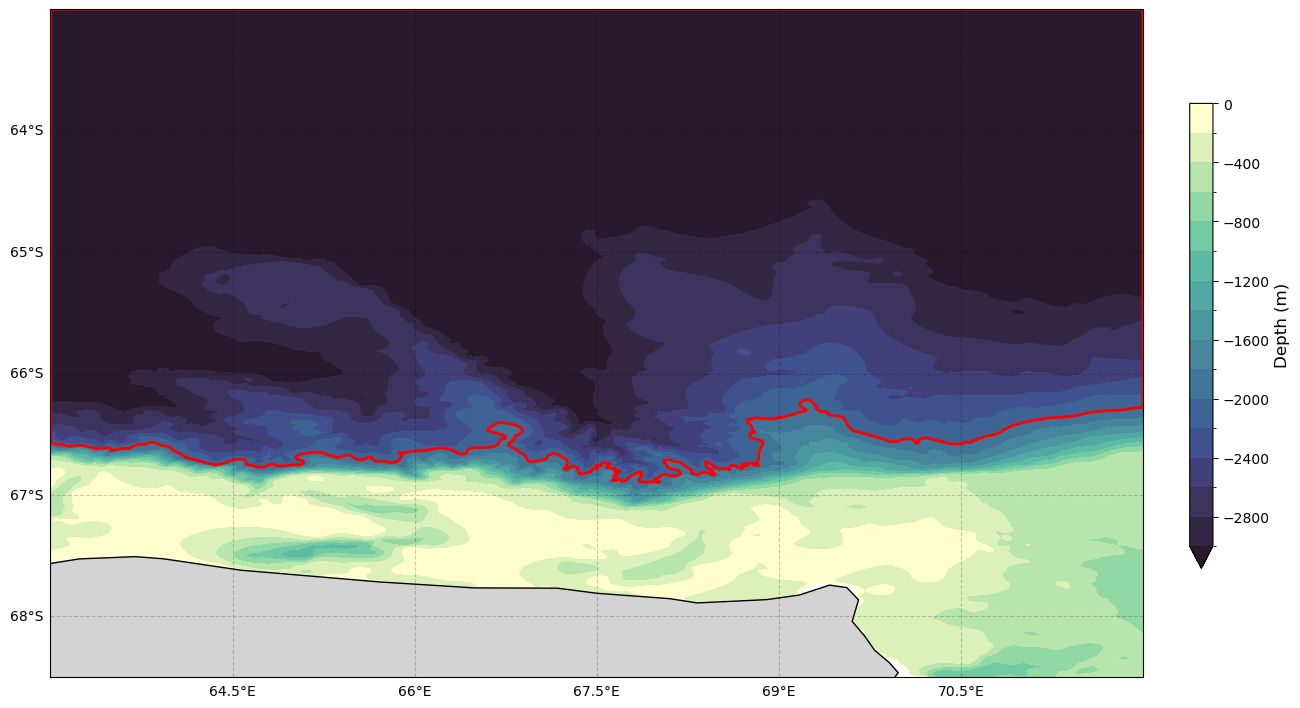

In [22]:
#This plots the polygon on the map to check it works

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-3000,200,200)]),add_colorbar=False)

# Add a contour line for the 600m isobath
##contour_line_coordinates comes from 'CTD mapping seals and CTD with type' notebook. 
#ax.plot(contour_line_coordinates[:, 0], contour_line_coordinates[:, 1], color='white', linewidth=3)

# # Plot the result using Matplotlib
# x, y = polygon.exterior.xy

# Plot the contour polygon
ax.plot(x, y, color='red', linewidth=2)

# Create a colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Depth (m)', fontsize=12)

plt.show()

In [23]:
#if happy with it, export it to a .csv file
# Open a CSV file for writing
with open('polygon_offshore.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['X', 'Y'])
    
    # Write the coordinates of the polygon's exterior ring
    for x, y in zip(polygon_offshore.exterior.xy[0], polygon_offshore.exterior.xy[1]):
        writer.writerow([x, y])

In [ ]:
#use this code to load in the polygon

# Load in the shelf polygon coordinates from the CSV
polygon_shelf_coords = pd.read_csv('polygon_shelf.csv')

# Create a Shapely Polygon from the coordinates
polygon_shelf = Polygon(zip(polygon_shelf_coords['X'], polygon_shelf_coords['Y']))

# Extract X and Y coordinates
x = polygon_shelf_coords['X'].tolist()
y = polygon_shelf_coords['Y'].tolist()